### Uber Pickups Analysis Quiz

The question set is based on the June dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [23]:
df = pd.read_csv('./data/uber-raw-data-jun14.csv')
df.head(10)

,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512
5,6/1/2014 0:08:00,40.7152,-73.9917,B02512
6,6/1/2014 0:08:00,40.7282,-73.9910,B02512
7,6/1/2014 0:08:00,40.3042,-73.9794,B02512
8,6/1/2014 0:09:00,40.7270,-73.9915,B02512
9,6/1/2014 0:10:00,40.7221,-73.9965,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [25]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df['Date'] = df['Date/Time'].dt.date
df['Time'] = df['Date/Time'].dt.time
pickup_cnt = df.groupby('Date')['Lat'].count()
date_with_most_pickups = pickup_cnt.idxmax()

print("Date with the most number of pickups:", date_with_most_pickups)

Date with the most number of pickups: 2014-06-13


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [26]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Date'] = df['Date/Time'].dt.date
pickup_cnt = df.groupby('Date')['Lat'].count()

date_with_highest_pickups = pickup_counts.idxmax()
number_of_pickups = pickup_counts[date_with_highest_pickups]

print("Date with the highest number of pickups:", date_with_highest_pickups)
print("Number of Uber pickups on the highest pickup date:", number_of_pickups)

Date with the highest number of pickups: 2014-06-13
Number of Uber pickups on the highest pickup date: 31207


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [33]:
unique_companies = df['Base'].nunique()
print(unique_companies)

5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [35]:
# Group by TLC base company and count the number of pickups
pickup_counts = df.groupby('Base')['Lat'].count()
highest_pickup_company = pickup_counts.idxmax()
print("TLC base company with the highest number of pickups:", highest_pickup_company)

TLC base company with the highest number of pickups: B02598


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [36]:
# Group by TLC base company and count the number of pickups
pickup_counts = df.groupby('Base')['Lat'].count()
print(pickup_counts)

Base
B02512     32509
B02598    242975
B02617    184460
B02682    194926
B02764      8974
Name: Lat, dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [37]:
# Extract the hour from the 'Date/Time' column


# Group by hour and count the number of pickups


# Find the hour with the highest number of pickups
df['Hour'] = df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
pickup_counts1 = df.groupby('Hour').size()
hour_with_highest_pickups = pickup_counts1.idxmax()

am_pm = 'AM' if hour_with_highest_pickups < 12 else 'PM'
if hour_with_highest_pickups > 12:
    hour_with_highest_pickups -= 12

print("Hour with the highest number of pickups:", hour_with_highest_pickups, am_pm)


Hour with the highest number of pickups: 5 PM


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

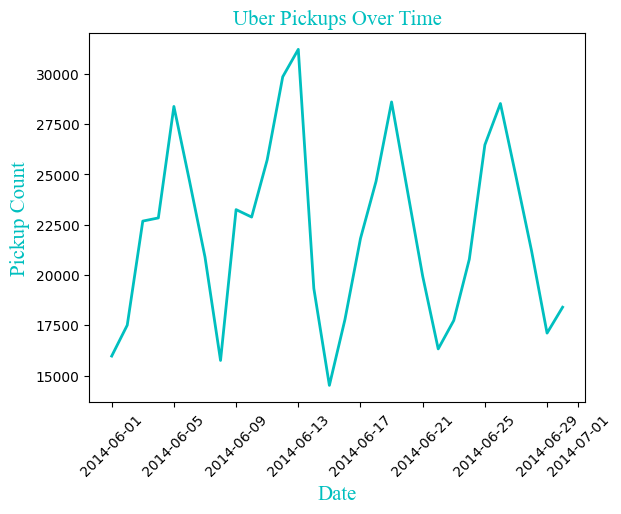

In [39]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups


pickup_count_by_date = df.groupby('Date')['Lat'].count()

#print(pickup_count_by_date)


# Create a line plot to visualize the number of pickups over time

plt.plot(pickup_count_by_date.index, pickup_count_by_date.values,color= 'c' ,linewidth = 2)

plt.xlabel("Date",fontsize = 15,fontname = 'Times New Roman',color = 'c')
plt.ylabel("Pickup Count",fontsize = 15,fontname = 'Times New Roman',color = 'c')
plt.title("Uber Pickups Over Time",fontsize = 15,fontname = 'Times New Roman',color = 'c')
plt.xticks(rotation=45)
plt.show()



#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

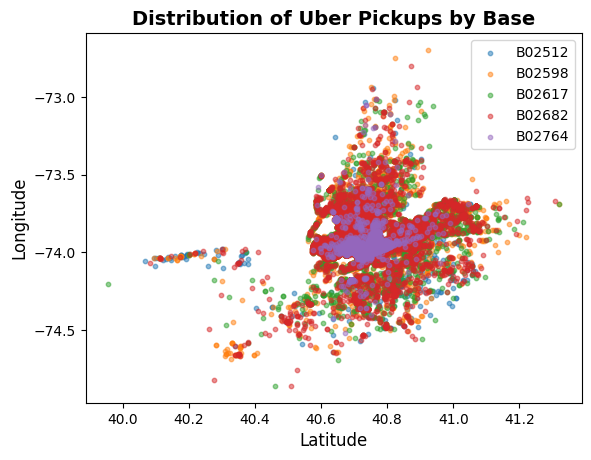

In [40]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
grouped_data = df.groupby('Base')

# Create a scatter plot for each group
for group_name, group_data in grouped_data:
    plt.scatter(group_data['Lat'], group_data['Lon'], label=group_name, s=10, alpha=0.5)

plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)
plt.title('Distribution of Uber Pickups by Base', fontsize=14, fontweight='bold')
plt.legend()

plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

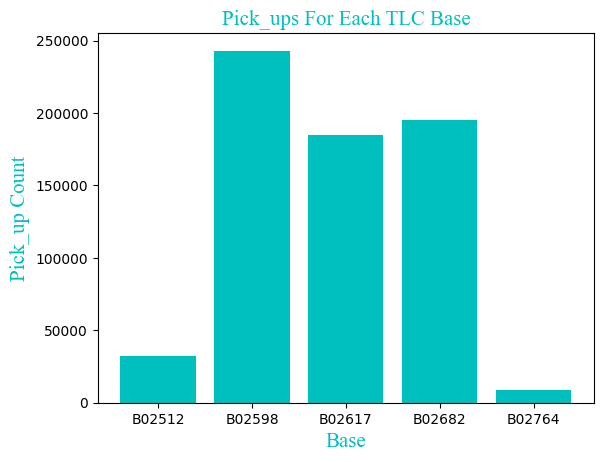

In [41]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
pickup_count_base = df.groupby('Base')['Lat'].count()
#print(pickup_count_base)
plt.bar(pickup_count_base.index,pickup_count_base.values, color = 'c')
plt.xlabel('Base',fontname = 'times new roman',fontsize = 15,c = 'c')
plt.ylabel('Pick_up Count',fontname = 'times new roman',fontsize = 15,c = 'c')
plt.title('Pick_ups For Each TLC Base',fontname = 'times new roman',fontsize = 15,c = 'c')
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

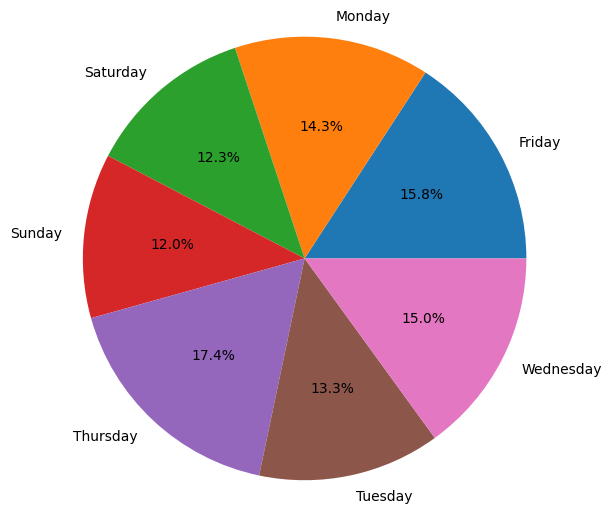

In [42]:


# Find the busiest time of day (hour) for Uber pickups
busiest_hour = pickup_counts1.idxmax()

# Print the busiest hour for Uber pickups
#print("Busiest time of day for Uber pickups:", busiest_hour)
df['DayOfWeek'] = df['Date/Time'].dt.day_name()
#print(df['DayOfWeek'])
pickup_counts = df.groupby('DayOfWeek')['Lat'].count()
labels = pickup_counts.index
counts = pickup_counts.values
percentages = counts / counts.sum() * 100
plt.pie(percentages, labels=labels, autopct='%0.1f%%',radius=1.5)
plt.show()
